In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Calculate C_protein_stock
V_s = 203 # uL
V_d = 2510.4 # uL
l = 1 # cm
A = 0.2518-0.06301 # Absorbance
epsilon = 17600 # M^-1 cm^-1
C_protein_stock = (A * V_d) / (epsilon * l * V_s)
# convert to uM
C_protein_stock = C_protein_stock * 1e6
print('C_protein_stock:', C_protein_stock)

C_protein_stock: 132.65181818181821


In [3]:
# Dilution calculation for GuHCl denaturation
C_protein_stock = 132 # uM -> stock concentration
C_protein_dil = 4 # uM -> target concentration
V_protein_dil = 1500 # uL -> target volume

V_protein_stock = (C_protein_dil * V_protein_dil) / C_protein_stock
V_buffer = V_protein_dil - V_protein_stock

print(f"Add {V_protein_stock:.4f} uL of protein stock to {V_buffer:.2f} uL of buffer (H20) to make {V_protein_dil} uL of {C_protein_dil} uM protein solution.")

# Calculate mass of protein solution to add (neglectiong protein mass)
V_protein_liter = V_protein_stock * 1e-6 # L
protein_mass = V_protein_liter * 1000 # g
print(f"Add {protein_mass:.6f} g of protein to {V_buffer:.4f} uL of buffer to make {V_protein_dil} uL of {C_protein_dil} uM protein solution.")

Add 45.4545 uL of protein stock to 1454.55 uL of buffer (H20) to make 1500 uL of 4 uM protein solution.
Add 0.045455 g of protein to 1454.5455 uL of buffer to make 1500 uL of 4 uM protein solution.


In [13]:
# GuHCl dilution series
GuHCl_stock = 8.0 # M
GuHCl_targets = [1, 2, 3, 4, 5, 2.5] # M
GuHCl_density = 1.18e3 # g/L

V_target = 0.0015 # L
V_stocks = [(V_target * target) / GuHCl_stock for target in GuHCl_targets] #L

# Calculate mass of GuHCl to add
m_stocks = [V * GuHCl_density for V in V_stocks] # g
print(m_stocks)

# Calculate mass of tampon to add
V_tampon = [V_target - V_protein_liter - V for V in V_stocks] # L
m_tampon = [V * 1.0 for V in V_tampon]

# Convert to good units (mg, uL)
V_stocks = [V * 1e6 for V in V_stocks] # uL
m_stocks = [m * 1e3 for m in m_stocks] # mg
V_tampon = [V * 1e6 for V in V_tampon] # uL
m_tampon = [m * 1e6 for m in m_tampon] # mg

# Make a table
df = pd.DataFrame({'GuHCl target (M)': GuHCl_targets, 'Volume GuHCl to add (uL)': V_stocks, 
                   'Mass GuHCl to add (mg)': m_stocks, 'Volume tampon to add (uL)': V_tampon, 'Mass tampon to add (mg)': m_tampon,
                     'Volume protein to add (uL)': [V_protein_stock]*len(GuHCl_targets), 'Mass protein to add (mg)': [protein_mass*1e3]*len(GuHCl_targets)})
df.head(6)

[0.22125, 0.4425, 0.6637500000000001, 0.885, 1.10625, 0.553125]


,GuHCl target (M),Volume GuHCl to add (uL),Mass GuHCl to add (mg),Volume tampon to add (uL),Mass tampon to add (mg),Volume protein to add (uL),Mass protein to add (mg)
0,1.0,187.50,221.250,1267.045455,1267.045455,45.454545,45.454545
1,2.0,375.00,442.500,1079.545455,1079.545455,45.454545,45.454545
2,3.0,562.50,663.750,892.045455,892.045455,45.454545,45.454545
3,4.0,750.00,885.000,704.545455,704.545455,45.454545,45.454545
4,5.0,937.50,1106.250,517.045455,517.045455,45.454545,45.454545
5,2.5,468.75,553.125,985.795455,985.795455,45.454545,45.454545


# Calculation of real concentrations of proteins based on exp mesurments

In [18]:
# Load mesured data
protein_data = pd.read_csv('../../data/protein_diluition_data.csv')
protein_data.head(10)

,concentrazione_GuHCl,massa_tampone,m_proteina,m_dentaturante
0,0 M,1.453,0.0447,0.000
1,1 M,1.243,0.0454,0.240
2,2 M,1.072,0.0450,0.443
3,2.5 M,0.984,0.0450,0.549
4,3 M,0.894,0.0456,0.682
5,4 M,0.727,0.0459,0.879
6,5 M,0.513,0.0440,1.116


In [19]:
# Calculate Protein concentration
# C_protein = C_protein_stock * (m_protein / (m_protein + m_GuHcl/GuHCl_density + m_buffer))
GuHCl_density = 1.187 # g/mL
C_protein_stock = 132.65 # uM
C_protein = C_protein_stock * (protein_data['m_proteina'] / (protein_data['m_proteina'] + protein_data['m_dentaturante']/GuHCl_density + protein_data['massa_tampone']))
protein_data['C_protein'] = C_protein
protein_data.head(10)

,concentrazione_GuHCl,massa_tampone,m_proteina,m_dentaturante,C_protein
0,0 M,1.453,0.0447,0.000,3.959041
1,1 M,1.243,0.0454,0.240,4.040218
2,2 M,1.072,0.0450,0.443,4.005644
3,2.5 M,0.984,0.0450,0.549,4.002151
4,3 M,0.894,0.0456,0.682,3.994855
5,4 M,0.727,0.0459,0.879,4.023091
6,5 M,0.513,0.0440,1.116,3.898382


In [20]:
# Save protein data
protein_data.to_csv('../../data/protein_diluition_data_with_C.csv', index=False)

## Load spectrums

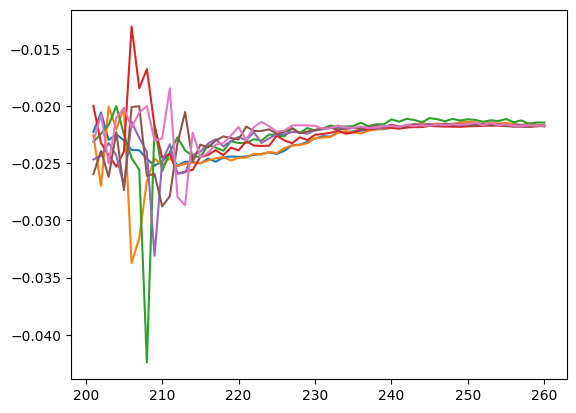

In [4]:
# load ellipticity spectrums
base_data_path = "../../data/"
data_to_read = ["0bisM.dat", "1M.dat", "2M.dat", "2-5M.dat", "3M.dat", "4M.dat", "5M.dat"]

all_elipticity_data = pd.DataFrame()

for i, file in enumerate(data_to_read):
    file_path = base_data_path + file
    # Nota: Aggiusta 'delimiter' e 'skiprows' come necessario
    data = pd.read_csv(file_path, delimiter='\t', skiprows=1, names=['wavelength', f'ellipticity_{i}'])
    
    if i == 0:
        all_elipticity_data = data
    else:
        # Assicurati che ogni DataFrame sia allineato sull'asse delle lunghezze d'onda
        all_elipticity_data = pd.merge(all_elipticity_data, data, on='wavelength', how='outer')
    
    plt.plot(data['wavelength'], data[f'ellipticity_{i}'])

In [28]:
all_elipticity_data.head(10)

,wavelength,ellipticity_0,ellipticity_1,ellipticity_2,ellipticity_3,ellipticity_4,ellipticity_5,ellipticity_6
0,260,-0.02178,-0.02169,-0.02145,-0.02176,-0.02171,-0.02172,-0.02172
1,259,-0.02166,-0.02163,-0.02144,-0.02176,-0.02172,-0.02177,-0.02173
2,258,-0.02175,-0.02152,-0.02156,-0.02181,-0.02176,-0.02182,-0.02169
3,257,-0.02167,-0.02166,-0.02126,-0.02178,-0.02167,-0.02181,-0.02178
4,256,-0.02157,-0.02160,-0.02142,-0.02177,-0.02171,-0.02180,-0.02174
5,255,-0.02160,-0.02146,-0.02114,-0.02176,-0.02167,-0.02173,-0.02161
6,254,-0.02161,-0.02155,-0.02132,-0.02172,-0.02162,-0.02163,-0.02168
7,253,-0.02151,-0.02143,-0.02125,-0.02172,-0.02161,-0.02170,-0.02147
8,252,-0.02164,-0.02158,-0.02138,-0.02174,-0.02168,-0.02154,-0.02168
9,251,-0.02159,-0.02143,-0.02122,-0.02176,-0.02161,-0.02172,-0.02146


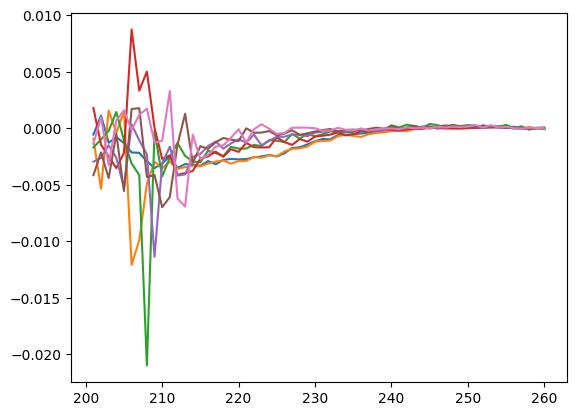

In [5]:
# Renormalize baselines to 0 -> subtract to each column the mean of the first 5 values
all_elipticity_data.iloc[:, 1:] = all_elipticity_data.iloc[:, 1:] - all_elipticity_data.iloc[:5, 1:].mean()

# Plot
for i in range(len(data_to_read)):
    plt.plot(all_elipticity_data['wavelength'], all_elipticity_data[f'ellipticity_{i}'])

# plot in another window
    

In [ ]:
# Export data
all_elipticity_data.to_csv('../../data/ellipticity_data_normalized.csv', index=False)

In [6]:
# divide each spectrum by its protein concentration
protein_data = pd.read_csv('../../data/protein_diluition_data_with_C.csv')
for i in range(len(data_to_read)):
    all_elipticity_data[f'ellipticity_{i}'] = all_elipticity_data[f'ellipticity_{i}'] / protein_data['C_protein'][i]

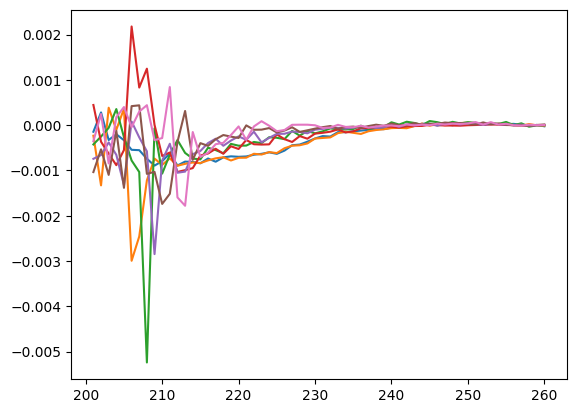

In [7]:
plt.figure()
for i in range(len(data_to_read)):
    plt.plot(all_elipticity_data['wavelength'], all_elipticity_data[f'ellipticity_{i}'])


In [8]:
# export data
all_elipticity_data.to_csv('../../data/ellipticity_data_normalized_by_concentration.csv', index=False)

### $\theta$ vs $C_{GuHCl}$

**Note:** $\theta$ has to be normalized dividing it by the $C_\text{protein}$

In [30]:
ell_data = pd.read_csv('../../data/ellipticity_data_normalized.csv')
# Take mean of ellipticity in two ranges: 224-226 and 227-229 (of wavelength)

# Filter data for specific wavelength ranges
range_224_226 = ell_data[(ell_data['wavelength'] >= 224) & (ell_data['wavelength'] <= 226)]
range_227_229 = ell_data[(ell_data['wavelength'] >= 227) & (ell_data['wavelength'] <= 229)]
range_224_229 = ell_data[(ell_data['wavelength'] >= 224) & (ell_data['wavelength'] <= 229)]

# Calculate the mean and std ellipticity for each range
mean_224_226 = range_224_226.iloc[:, 1:].mean()
std_224_226 = range_224_226.iloc[:, 1:].std()

mean_227_229 = range_227_229.iloc[:, 1:].mean()
std_227_229 = range_227_229.iloc[:, 1:].std()

mean_224_229 = range_224_229.iloc[:, 1:].mean()
std_224_229 = range_224_229.iloc[:, 1:].std()

# Divide each mean by the protein concentration to get the molar ellipticity
protein_data_C = pd.read_csv('../../data/protein_diluition_data_with_C.csv')
mean_224_226 = [mean_224_226[i] / protein_data_C["C_protein"][i] for i in range(len(mean_224_226))]
std_224_226 = [std_224_226[i] / protein_data_C["C_protein"][i] for i in range(len(std_224_226))]

mean_227_229 = [mean_227_229[i] / protein_data_C["C_protein"][i] for i in range(len(mean_227_229))]
std_227_229 = [std_227_229[i] / protein_data_C["C_protein"][i] for i in range(len(std_227_229))]

mean_224_229 = [mean_224_229[i] / protein_data_C["C_protein"][i] for i in range(len(mean_224_229))]
std_224_229 = [std_224_229[i] / protein_data_C["C_protein"][i] for i in range(len(std_224_229))]

# Make a table with the results (eahc column row is a different GuHCl concentration)
df = pd.DataFrame({'GuHCl target (M)': [0, 1, 2, 2.5, 3, 4, 5], 'Mean molar ellipticity 224-226': mean_224_226, 'Std ellipticity 224-226': std_224_226,
                   'Mean molar ellipticity 227-229': mean_227_229, 'Std ellipticity 227-229': std_227_229, 'Mean molar ellipticity 224-229': mean_224_229, 'Std ellipticity 224-229': std_224_229})


df.head(7)

,GuHCl target (M),Mean molar ellipticity 224-226,Std ellipticity 224-226,Mean molar ellipticity 227-229,Std ellipticity 227-229,Mean molar ellipticity 224-229,Std ellipticity 224-229
0,0.0,-0.000598,0.000035,-0.000412,0.000042,-0.000505,0.000108
1,1.0,-0.000573,0.000056,-0.000433,0.000026,-0.000503,0.000086
2,2.0,-0.000284,0.000022,-0.000161,0.000061,-0.000222,0.000079
3,2.5,-0.000312,0.000110,-0.000303,0.000065,-0.000308,0.000081
4,3.0,-0.000220,0.000051,-0.000157,0.000020,-0.000188,0.000049
5,4.0,-0.000114,0.000049,-0.000103,0.000052,-0.000108,0.000045
6,5.0,-0.000084,0.000064,0.000010,0.000001,-0.000037,0.000065


In [ ]:
# Save the table
df.to_csv('../results/molar_ellipticity.csv', index=False)

In [9]:
# Calculate the mean molar ellipticity for each range usign pre normalized data
ell_data_norm = pd.read_csv('../../data/ellipticity_data_normalized_by_concentration.csv')

# Filter data for specific wavelength ranges
range_224_226 = ell_data_norm[(ell_data_norm['wavelength'] >= 224) & (ell_data_norm['wavelength'] <= 226)]
range_227_229 = ell_data_norm[(ell_data_norm['wavelength'] >= 227) & (ell_data_norm['wavelength'] <= 229)]
range_224_229 = ell_data_norm[(ell_data_norm['wavelength'] >= 224) & (ell_data_norm['wavelength'] <= 229)]

# Calculate the mean and std ellipticity for each range
mean_224_226 = range_224_226.iloc[:, 1:].mean()
std_224_226 = range_224_226.iloc[:, 1:].std()
mean_227_229 = range_227_229.iloc[:, 1:].mean()
std_227_229 = range_227_229.iloc[:, 1:].std()
mean_224_229 = range_224_229.iloc[:, 1:].mean()
std_224_229 = range_224_229.iloc[:, 1:].std()

# Make a table with the results (eahc column row is a different GuHCl concentration)
df = pd.DataFrame({'GuHCl target (M)': [0, 1, 2, 2.5, 3, 4, 5], 'Mean molar ellipticity 224-226': mean_224_226, 'Std ellipticity 224-226': std_224_226,
                   'Mean molar ellipticity 227-229': mean_227_229, 'Std ellipticity 227-229': std_227_229, 'Mean molar ellipticity 224-229': mean_224_229, 'Std ellipticity 224-229': std_224_229})

df.head(7)

,GuHCl target (M),Mean molar ellipticity 224-226,Std ellipticity 224-226,Mean molar ellipticity 227-229,Std ellipticity 227-229,Mean molar ellipticity 224-229,Std ellipticity 224-229
ellipticity_0,0.0,-0.000598,0.000035,-0.000412,0.000042,-0.000505,0.000108
ellipticity_1,1.0,-0.000573,0.000056,-0.000433,0.000026,-0.000503,0.000086
ellipticity_2,2.0,-0.000284,0.000022,-0.000161,0.000061,-0.000222,0.000079
ellipticity_3,2.5,-0.000312,0.000110,-0.000303,0.000065,-0.000308,0.000081
ellipticity_4,3.0,-0.000220,0.000051,-0.000157,0.000020,-0.000188,0.000049
ellipticity_5,4.0,-0.000114,0.000049,-0.000103,0.000052,-0.000108,0.000045
ellipticity_6,5.0,-0.000084,0.000064,0.000010,0.000001,-0.000037,0.000065


In [10]:
# export data
df.to_csv('../results/molar_ellipticity_2.csv', index=False)

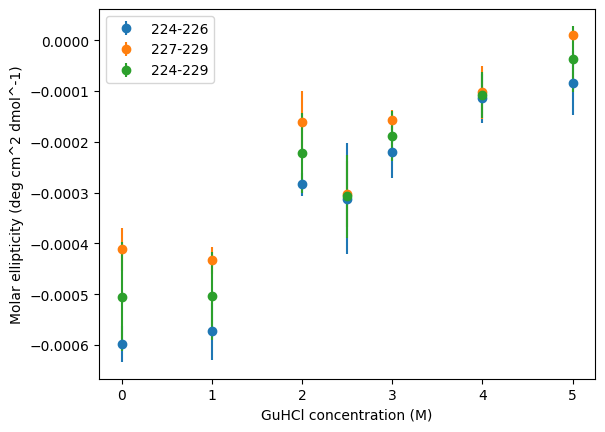

In [11]:
# Plot the results
plt.errorbar(df['GuHCl target (M)'], df['Mean molar ellipticity 224-226'], yerr=df['Std ellipticity 224-226'], fmt='o', label='224-226')
plt.errorbar(df['GuHCl target (M)'], df['Mean molar ellipticity 227-229'], yerr=df['Std ellipticity 227-229'], fmt='o', label='227-229')
plt.errorbar(df['GuHCl target (M)'], df['Mean molar ellipticity 224-229'], yerr=df['Std ellipticity 224-229'], fmt='o', label='224-229')
plt.xlabel('GuHCl concentration (M)')
plt.ylabel('Molar ellipticity (deg cm^2 dmol^-1)')
plt.legend()
plt.show()